In [1]:
import pandas as pd
import numpy as np


In [2]:
original_data = pd.read_csv("D:/kishore/adult.csv",names=["Age", "Workclass", "fnlwgt","Education", "Education-Num",
"Marital Status","Occupation", "Relationship","Race", "Gender", "Capital Gain", "Capital Loss",
 "Hours per week", "Country", "Target"],engine='python',na_values='?',sep=r'\s*,\s*')


In [3]:
original_data.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

C:\Users\Preethi\AppData\Local\Temp\ipykernel_23928\3026672346.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column]==np.object:
C:\Users\Preethi\AppData\Local\Temp\ipykernel_23928\3026672346.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column]==np.object:
C:\Users\Preethi\AppData\Local\Temp\ipykernel_23928\3026672346.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence 

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

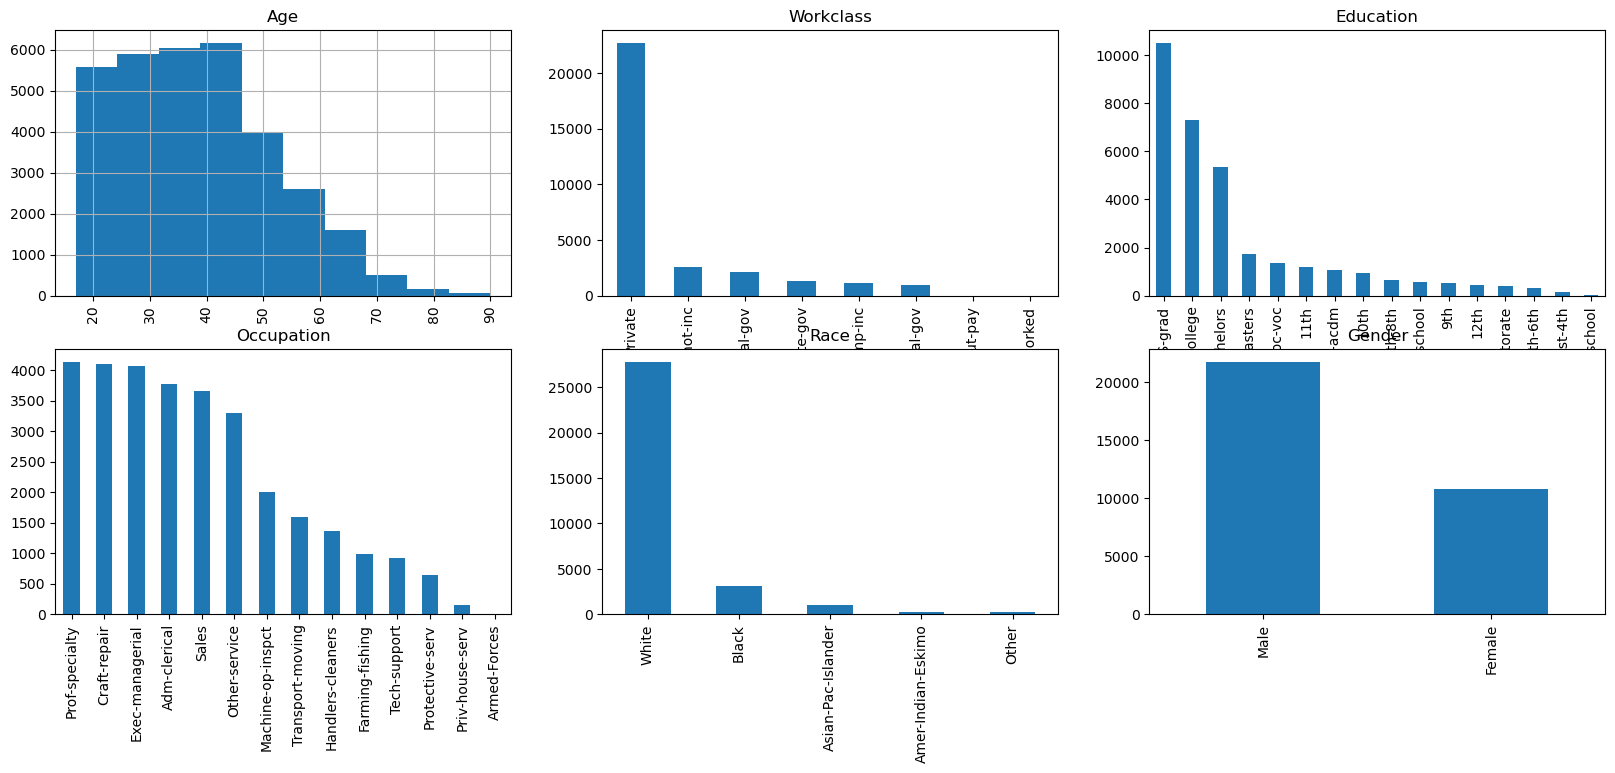

In [5]:
fig = plt.figure(figsize=(20,20))
col=3
row=math.ceil(float(original_data.shape[1]/col))
for i , column in enumerate(["Age", "Workclass","Education","Occupation","Race", "Gender"]):
    ax=fig.add_subplot(row,col,i+1)
    ax.set_title(column)
    if original_data.dtypes[column]==np.object:
        original_data[column].value_counts().plot(kind='bar',axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplot_adjust(hspace=0.7,wspace=0.2)
plt.show()


In [6]:
import sklearn.preprocessing as preprocessing

In [7]:
le=preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data['Marital Status'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,9,13,4,0,Not-in-family,4,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,13,2,3,Husband,4,1,0,0,13,United-States,<=50K
2,38,Private,215646,11,9,0,5,Not-in-family,4,1,0,0,40,United-States,<=50K
3,53,Private,234721,1,7,2,5,Husband,2,1,0,0,40,United-States,<=50K
4,28,Private,338409,9,13,2,9,Wife,2,0,0,0,40,Cuba,<=50K


In [8]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,7,12,2,12,Wife,4,0,0,0,38,United-States,0
32557,40,Private,154374,11,9,2,6,Husband,4,1,0,0,40,United-States,1
32558,58,Private,151910,11,9,6,0,Unmarried,4,0,0,0,40,United-States,0
32559,22,Private,201490,11,9,4,0,Own-child,4,1,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,11,9,2,3,Wife,4,0,15024,0,40,United-States,1


In [9]:
original_data.Target.unique()

array([0, 1])

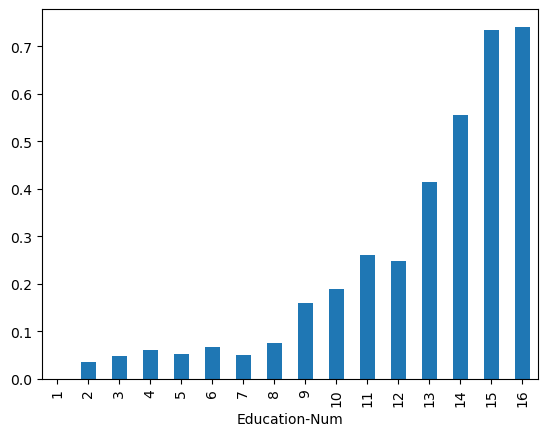

In [10]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split  # this function is used to split our dataset into two one for training 
#and building models and another for testing

In [12]:
X=original_data[['Education-Num','Occupation']]
Y=original_data['Target']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
from sklearn.svm import SVC

In [14]:
classifier=SVC() #declaring SVC with no tunning
classifier.fit(X_train,Y_train) # this were the model is trained with traing dataset
score=classifier.score(X_test,Y_test) #Predicting the result and giving accuracy
print(score)

0.7861200675571933


In [15]:
#to improve our accuracy we are going to see which is more correlated with target
#for that we are going to create a matrix in heatmap
import seaborn as sns

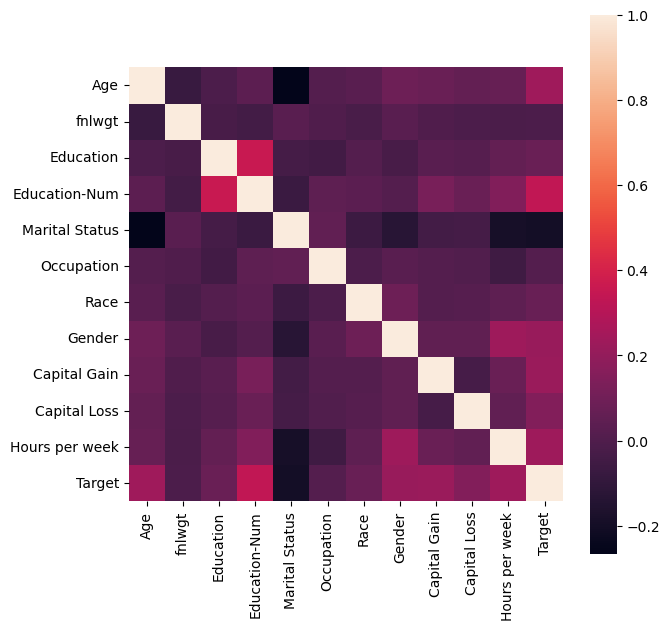

In [16]:
corrmat=original_data.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,square=True)
plt.show()

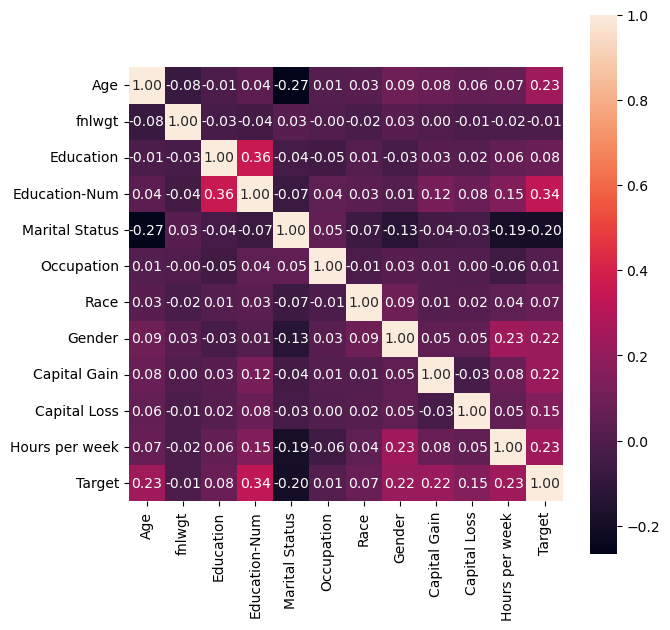

In [17]:
corrmat=original_data.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,square=True,annot=True,fmt='.2f')
plt.show()

In [94]:
# resetting the features
X=original_data[['Education-Num','Occupation','Age','Gender','Hours per week','Capital Gain']]
Y=original_data['Target']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier=SVC() 
classifier.fit(X_train,Y_train) 
score=classifier.score(X_test,Y_test)
print(score)

0.7945647167204053


In [95]:
# setting our kernel to Radial base function and penalty parameter to 1
classifier=SVC(kernel='rbf',C=1.0) 
classifier.fit(X_train,Y_train) 
score=classifier.score(X_test,Y_test)
print(score)
#here we are getting same accuracy compared to above beacause kernel=rbc and c= 1.0 is the default 

0.7945647167204053


In [18]:
classifier=SVC(kernel='rbf',C=20.0) 
classifier.fit(X_train,Y_train) 
score=classifier.score(X_test,Y_test)
print(score)
#this is called  hyper plane tunning

0.7850452940273299


In [19]:
classifier=SVC(kernel='linear',C=20.0) 
classifier.fit(X_train,Y_train) 
score=classifier.score(X_test,Y_test)
print(score)

0.7551051742668509
